# Aircraft Engine Gaseous Emissions Clustering


In [391]:
# UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
#do this before importing KMeans
import os
os.environ["OMP_NUM_THREADS"] = "2"

In [393]:
import pandas as pd 
import numpy as np 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans 
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 
from sklearn.cluster import KMeans

In [395]:
path_gse =r"C:\Users\maryh\OneDrive\Documents\LEARNING & DEVELOPMENT\Data Science\Projects\ICAO Aircraft Engine Emissions-Kaggle dataset\ges.csv"
path_gse = path_gse.replace("\\" ,"/")


In [397]:
gse_df = pd.read_csv(path_gse)


In [399]:
gse_df.head()

,UID No,GSDB No,Manufacturer,Engine Identification,Combustor Description,Eng Type,B/P Ratio,Pressure Ratio,Rated Thrust (kN),Data Status,...,Final Test Date,Compliance with fuel venting requirements,Remark 1,Remark 2,Remark 3,Remark 4,Remark 5,Remark 6,Remark 7,Remark 8
0,1AS001,1.0,Allied Signal,TFE731-2-2B,NaN,TF,2.6,13.9,15.6,PR,...,01/04/1976,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1AS002,1.0,Allied Signal,TFE731-3,NaN,TF,2.6,14.3,16.5,PR,...,01/08/1976,NaN,Not required to meet GASEOUS regulations,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,4AL003,4.0,Rolls-Royce Corporation,AE3007A,NaN,MTF,5.2,18.1,33.7,C,...,19/04/1995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6AL004,6.0,Rolls-Royce Corporation,AE3007C1,NaN,MTF,5.1,16.6,31.5,C,...,19/04/1995,NaN,Results based on Rolls Royce report EDR 15171B,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6AL005,6.0,Rolls-Royce Corporation,AE3007A1,Type 1,MTF,4.8,18.0,34.9,R,...,19/04/1995,NaN,For effectivity see Rolls-Royce Notice to Oper...,Results are based on Rolls-Royce report EDR 15...,AE3007A1 data in this report replace data repo...,NaN,NaN,NaN,NaN,NaN


In [401]:
nvpm_df.head()

,uid_no,nvpmdb_no,manufacturer,engine_identification,combustor_description,eng_type,b/p_ratio,pressure_ratio,rated_thrust_(kn),data_superseded,...,initial_test_date,final_test_date,remark_1,remark_2,remark_3,remark_4,remark_5,remark_6,remark_7,remark_8
0,01P14RR101,1,Rolls-Royce plc,Trent 768,Phase5,MTF,5.2,34.5,304.3,NaN,...,02/06/2014,02/06/2014,Certification Report EDNS01000788666,The maximum EImass occurs between 30% and 85% Foo,The maximum EInum occurs between 30% and 85% Foo,Corrected peak EI number value (fuel correctio...,NaN,NaN,NaN,NaN
1,01P14RR102,1,Rolls-Royce plc,Trent 772,Phase5,MTF,5.0,36.3,320.3,NaN,...,02/06/2014,02/06/2014,Certification Report EDNS01000788666,Data valid for Trent 772B and 772C,The maximum EImass occurs between 30% and 85% Foo,The maximum EInum occurs between 30% and 85% Foo,Corrected peak EI number value (fuel correctio...,NaN,NaN,NaN
2,01P18RR103,1,Rolls-Royce plc,Trent 970-84,Phase5 Tiled,TF,8.5,38.0,338.7,NaN,...,18/11/2015,25/04/2016,Certification Report EDNS01000750023,The maximum EImass occurs between 30% and 85% Foo,Corrected peak EI number value (fuel correctio...,NaN,NaN,NaN,NaN,NaN
3,01P18RR104,1,Rolls-Royce plc,Trent 972-84,Phase5 Tiled,TF,8.4,38.7,346.0,NaN,...,18/11/2015,25/04/2016,Certification Report EDNS01000750023,The maximum EImass occurs between 30% and 85% Foo,Corrected peak EI number value (fuel correctio...,NaN,NaN,NaN,NaN,NaN
4,01P18RR105,1,Rolls-Royce plc,Trent 972E-84,Phase5 Tiled,TF,8.4,38.7,346.0,NaN,...,18/11/2015,25/04/2016,Certification Report EDNS01000750023,The maximum EImass occurs between 30% and 85% Foo,Corrected peak EI number value (fuel correctio...,NaN,NaN,NaN,NaN,NaN


## Data wrangling

In [404]:
# Format column names- remove whitespaces and odd characters and capital letters.
# Check for superseded rows and remove the superseded rows – column [Data Superseded]=Yes 
# Check and remove duplicated rows 
# Check for Out of service engines  - we can remove because aircraft with these engines will eventually be decommisioned or retroffited with  newer engines types. 
# Check missing values

In [406]:
# Format column names- remove whitespaces and odd characters and capital letters.
gse_df.columns = gse_df.columns.str.replace(' ', '_').str.lower()


In [408]:
gse_df.shape

(894, 105)

In [410]:
gse_df.columns.tolist()

['uid_no',
 'gsdb_no',
 'manufacturer',
 'engine_identification',
 'combustor_description',
 'eng_type',
 'b/p_ratio',
 'pressure_ratio',
 'rated_thrust_(kn)',
 'data_status',
 'data_superseded',
 'superseded_by_uid_no',
 'test_engine_status',
 'data_corr_as_annex_16',
 'current_engine_status',
 'current_engine_status_date',
 'hc_ei_t/o_(g/kg)',
 'hc_ei_c/o_(g/kg)',
 'hc_ei_app_(g/kg)',
 'hc_ei_idle_(g/kg)',
 'hc_number_test',
 'hc_number_eng',
 'hc_dp/foo_avg_(g/kn)',
 'hc_dp/foo_sigma_(g/kn)',
 'hc_dp/foo_min_(g/kn)',
 'hc_dp/foo_max_(g/kn)',
 'hc_dp/foo_characteristic_(g/kn)',
 'hc_dp/foo_characteristic_(%_of_reg_limit)_',
 'hc_lto_total_mass_(g)',
 'co_ei_t/o_(g/kg)',
 'co_ei_c/o_(g/kg)',
 'co_ei_app_(g/kg)',
 'co_ei_idle_(g/kg)',
 'co_number_test',
 'co_number_eng',
 'co_dp/foo_avg_(g/kn)',
 'co_dp/foo_sigma_(g/kn)',
 'co_dp/foo_min_(g/kn)',
 'co_dp/foo_max_(g/kn)',
 'co_dp/foo_characteristic_(g/kn)',
 'co_dp/foo_characteristic_(%_of_reg_limit)_',
 'co_lto_total_mass_(g)',
 'nox_e

In [412]:
# Check for superseded rows and remove the superseded rows – column [Data Superseded]=Yes
gse_df = gse_df[gse_df['data_superseded'] != 'Yes']


In [414]:
gse_df.shape

(633, 105)

In [416]:
# delete gse duplicated rows
print("Number of duplicates" , gse_df.duplicated().sum())
gse_df = gse_df.drop_duplicates()
print(gse_df.shape)

Number of duplicates 59
(574, 105)


In [418]:
# Check for Out of service engines  - we can remove because aircraft with these engines will eventually be decommisioned or retroffited with  newer engines types. 
gse_df = gse_df[gse_df['current_engine_status']!='Out of service']
print(gse_df.shape)

(570, 105)


## Features selection

In [421]:
gse_df.columns.tolist()

['uid_no',
 'gsdb_no',
 'manufacturer',
 'engine_identification',
 'combustor_description',
 'eng_type',
 'b/p_ratio',
 'pressure_ratio',
 'rated_thrust_(kn)',
 'data_status',
 'data_superseded',
 'superseded_by_uid_no',
 'test_engine_status',
 'data_corr_as_annex_16',
 'current_engine_status',
 'current_engine_status_date',
 'hc_ei_t/o_(g/kg)',
 'hc_ei_c/o_(g/kg)',
 'hc_ei_app_(g/kg)',
 'hc_ei_idle_(g/kg)',
 'hc_number_test',
 'hc_number_eng',
 'hc_dp/foo_avg_(g/kn)',
 'hc_dp/foo_sigma_(g/kn)',
 'hc_dp/foo_min_(g/kn)',
 'hc_dp/foo_max_(g/kn)',
 'hc_dp/foo_characteristic_(g/kn)',
 'hc_dp/foo_characteristic_(%_of_reg_limit)_',
 'hc_lto_total_mass_(g)',
 'co_ei_t/o_(g/kg)',
 'co_ei_c/o_(g/kg)',
 'co_ei_app_(g/kg)',
 'co_ei_idle_(g/kg)',
 'co_number_test',
 'co_number_eng',
 'co_dp/foo_avg_(g/kn)',
 'co_dp/foo_sigma_(g/kn)',
 'co_dp/foo_min_(g/kn)',
 'co_dp/foo_max_(g/kn)',
 'co_dp/foo_characteristic_(g/kn)',
 'co_dp/foo_characteristic_(%_of_reg_limit)_',
 'co_lto_total_mass_(g)',
 'nox_e

In [423]:
# drop gse unnecessary features
gse_features = gse_df[[
    'eng_type', 'b/p_ratio', 'pressure_ratio', 'rated_thrust_(kn)',
    'hc_ei_t/o_(g/kg)', 'hc_ei_c/o_(g/kg)', 'hc_ei_app_(g/kg)', 'hc_ei_idle_(g/kg)','hc_dp/foo_characteristic_(g/kn)',
    'co_ei_t/o_(g/kg)', 'co_ei_c/o_(g/kg)', 'co_ei_app_(g/kg)', 'co_ei_idle_(g/kg)', 'co_dp/foo_characteristic_(g/kn)',
    'nox_ei_t/o_(g/kg)', 'nox_ei_c/o_(g/kg)', 'nox_ei_app_(g/kg)', 'nox_ei_idle_(g/kg)', 'nox_dp/foo_characteristic_(g/kn)',
    'sn_t/o', 'sn_c/o', 'sn_app', 'sn_idle', 'sn_characteristic',
    'hc_lto_total_mass_(g)', 'co_lto_total_mass_(g)', 'nox_lto_total_mass_(g)',
    'fuel_flow_t/o_(kg/sec)','fuel_flow_c/o_(kg/sec)','fuel_flow_app_(kg/sec)', 'fuel_flow_idle_(kg/sec)', 'fuel_lto_cycle_(kg)__',
   ]]
gse_features.head()


,eng_type,b/p_ratio,pressure_ratio,rated_thrust_(kn),hc_ei_t/o_(g/kg),hc_ei_c/o_(g/kg),hc_ei_app_(g/kg),hc_ei_idle_(g/kg),hc_dp/foo_characteristic_(g/kn),co_ei_t/o_(g/kg),...,sn_idle,sn_characteristic,hc_lto_total_mass_(g),co_lto_total_mass_(g),nox_lto_total_mass_(g),fuel_flow_t/o_(kg/sec),fuel_flow_c/o_(kg/sec),fuel_flow_app_(kg/sec),fuel_flow_idle_(kg/sec),fuel_lto_cycle_(kg)__
0,TF,2.6,13.9,15.6,0.11,0.13,4.26,20.04,62.3,1.39,...,NaN,NaN,823.0,2612.0,630.0,0.205,0.173,0.067,0.024,85.0
1,TF,2.6,14.3,16.5,0.06,0.07,1.41,9.04,27.4,1.13,...,NaN,NaN,393.0,2254.0,845.0,0.225,0.186,0.072,0.026,92.0
2,MTF,5.2,18.1,33.7,0.25,0.29,0.64,2.51,8.7,0.75,...,0.0,1.2,226.0,1468.0,1563.0,0.377,0.315,0.117,0.049,162.0
4,MTF,4.8,18.0,34.9,0.22,0.26,0.66,3.82,11.4,0.77,...,0.0,1.2,307.0,1865.0,1456.0,0.383,0.318,0.113,0.046,157.0
5,MTF,4.8,18.0,34.9,0.00,0.00,0.18,5.04,16.2,0.12,...,0.0,0.0,367.0,2383.0,1607.0,0.383,0.318,0.113,0.046,157.0


In [425]:
gse_features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 570 entries, 0 to 834
Data columns (total 32 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   eng_type                          569 non-null    object 
 1   b/p_ratio                         566 non-null    float64
 2   pressure_ratio                    569 non-null    float64
 3   rated_thrust_(kn)                 569 non-null    float64
 4   hc_ei_t/o_(g/kg)                  567 non-null    float64
 5   hc_ei_c/o_(g/kg)                  568 non-null    float64
 6   hc_ei_app_(g/kg)                  568 non-null    float64
 7   hc_ei_idle_(g/kg)                 568 non-null    float64
 8   hc_dp/foo_characteristic_(g/kn)   569 non-null    float64
 9   co_ei_t/o_(g/kg)                  568 non-null    float64
 10  co_ei_c/o_(g/kg)                  568 non-null    float64
 11  co_ei_app_(g/kg)                  568 non-null    float64
 12  co_ei_idle_(g

In [427]:
#Check for missing values. drop rows with nan
gse_features = gse_features.dropna()
#encode engine type
gse_processed = pd.get_dummies(data = gse_features , columns = ['eng_type'])

In [429]:
gse_processed.shape

(495, 33)

In [431]:
# Define X and normalize the dataset 
X = gse_processed.to_numpy()
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

array([[-0.54607881, -1.6401174 , -1.30669211, ..., -1.33637309,
         1.87082869, -1.87082869],
       [-0.70471086, -1.65293527, -1.29619099, ..., -1.35203267,
         1.87082869, -1.87082869],
       [-0.70471086, -1.65293527, -1.29619099, ..., -1.35203267,
         1.87082869, -1.87082869],
       ...,
       [-0.34778875, -2.49891454, -1.34082078, ..., -1.38961568,
        -0.53452248,  0.53452248],
       [-0.38744676, -2.42200734, -1.33031965, ..., -1.39587951,
        -0.53452248,  0.53452248],
       [-0.58573683, -2.29382866, -1.33031965, ..., -1.37082417,
        -0.53452248,  0.53452248]])

## Modelling

### K-means

In [531]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 12 , random_state= 3 )
k_means.fit(X)
labels = k_means.labels_
print("labels:", labels)
print("centroids:",k_means.cluster_centers_)


labels: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 1 0 2 0 0 2 0 0 2 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 1 2 2 2 0 2 2 0 0 0 0 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 

C:\Users\maryh\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


In [533]:
# assign labels to the df rows
gse_processed["Cluster"] = labels
gse_processed.head()


,b/p_ratio,pressure_ratio,rated_thrust_(kn),hc_ei_t/o_(g/kg),hc_ei_c/o_(g/kg),hc_ei_app_(g/kg),hc_ei_idle_(g/kg),hc_dp/foo_characteristic_(g/kn),co_ei_t/o_(g/kg),co_ei_c/o_(g/kg),...,co_lto_total_mass_(g),nox_lto_total_mass_(g),fuel_flow_t/o_(kg/sec),fuel_flow_c/o_(kg/sec),fuel_flow_app_(kg/sec),fuel_flow_idle_(kg/sec),fuel_lto_cycle_(kg)__,eng_type_MTF,eng_type_TF,Cluster
2,5.2,18.1,33.7,0.25,0.29,0.64,2.51,8.7,0.75,0.92,...,1468.0,1563.0,0.377,0.315,0.117,0.049,162.0,True,False,1
4,4.8,18.0,34.9,0.22,0.26,0.66,3.82,11.4,0.77,0.96,...,1865.0,1456.0,0.383,0.318,0.113,0.046,157.0,True,False,1
5,4.8,18.0,34.9,0.00,0.00,0.18,5.04,16.2,0.12,0.01,...,2383.0,1607.0,0.383,0.318,0.113,0.046,157.0,True,False,1
8,4.8,17.9,34.7,0.22,0.26,0.66,3.92,11.7,0.77,0.97,...,1874.0,1442.0,0.381,0.316,0.113,0.046,156.0,True,False,1
9,4.8,17.9,34.7,0.00,0.00,0.18,5.10,16.4,0.00,0.00,...,2389.0,1592.0,0.381,0.316,0.113,0.046,156.0,True,False,1


In [535]:
gse_processed['Cluster'].value_counts()

Cluster
1    290
0    193
2     12
Name: count, dtype: int64

In [537]:
# Summarize cluster characteristics
print("\nCluster Profiles:")
gse_processed.groupby('Cluster').mean().T



Cluster Profiles:


Cluster,0,1,2
b/p_ratio,6.883938,6.481724,3.941667
pressure_ratio,36.618653,27.269310,26.483333
rated_thrust_(kn),307.719689,99.549310,194.650000
hc_ei_t/o_(g/kg),0.052487,0.061655,0.412500
hc_ei_c/o_(g/kg),0.052280,0.065345,0.510000
hc_ei_app_(g/kg),0.129896,0.355448,3.099167
hc_ei_idle_(g/kg),2.460518,2.142414,38.073333
hc_dp/foo_characteristic_(g/kn),4.276684,5.651724,97.775000
co_ei_t/o_(g/kg),0.311813,0.529621,1.138333
co_ei_c/o_(g/kg),0.328031,0.712379,1.662500


#####  Cluster Profiles Interpretation

| **Feature**                      | **Cluster 0**: Low Thrust, Low Emission (Efficient) | **Cluster 1**: Moderate Thrust, High Emission (Older) | **Cluster 2**: High Thrust, Balanced Emission (Powerful) |
|----------------------------------|----------------------------------------------------|-----------------------------------------------------|---------------------------------------------------------|
| **Thrust (kN)**                  | ~99.5 (Lowest)                                    | ~194.6 (Moderate)                                    | ~307.7 (Highest)                                        |
| **Bypass Ratio (b/p_ratio)**      | 6.48 (Moderate)                                   | 3.94 (Lowest - Older Engines)                        | 6.88 (Highest – Modern Engines)                         |
| **Fuel Flow (kg/sec)**            | ~0.92 (Lowest)                                    | ~2.14 (Moderate)                                     | ~2.65 (Highest)                                         |
| **HC Emissions (g/kg)**           | 0.06–2.14 (Low)                                   | 0.41–38.07 (Highest)                                 | 0.05–2.46 (Moderate)                                    |
| **CO Emissions (g/kg)**           | ~0.53 (Low)                                       | ~1.66 (Highest)                                      | ~0.31 (Lowest)                                          |
| **NOx Total Mass (g)**            | ~3931 (Lowest)                                    | ~12492 (Moderate)                                    | ~16977 (Highest)                                        |
| **Engine Type (MTF)**             | ~34%                                              | ~16%                                                | ~4%                                                    |
| **Engine Type (TF)**              | ~66%                                              | ~83%                                                | ~95%                                                   |
| **Emission Pattern**              | Low across all phases                             | High across all phases                               | Balanced emissions across phases                        |
| **Cluster Label**                 | **"Low Thrust, Low Emission Engines (Efficient)"** | **"Moderate Thrust, High Emission Engines (Older)"** | **"High Thrust, Balanced Emission Engines (Powerful)"** |


In [540]:
# Select specific columns
# For individual columns:
for col in gse_processed.columns:
    idx = gse_processed.columns.get_loc(col)
    print(col,":",idx)

b/p_ratio : 0
pressure_ratio : 1
rated_thrust_(kn) : 2
hc_ei_t/o_(g/kg) : 3
hc_ei_c/o_(g/kg) : 4
hc_ei_app_(g/kg) : 5
hc_ei_idle_(g/kg) : 6
hc_dp/foo_characteristic_(g/kn) : 7
co_ei_t/o_(g/kg) : 8
co_ei_c/o_(g/kg) : 9
co_ei_app_(g/kg) : 10
co_ei_idle_(g/kg) : 11
co_dp/foo_characteristic_(g/kn) : 12
nox_ei_t/o_(g/kg) : 13
nox_ei_c/o_(g/kg) : 14
nox_ei_app_(g/kg) : 15
nox_ei_idle_(g/kg) : 16
nox_dp/foo_characteristic_(g/kn) : 17
sn_t/o : 18
sn_c/o : 19
sn_app : 20
sn_idle : 21
sn_characteristic : 22
hc_lto_total_mass_(g) : 23
co_lto_total_mass_(g) : 24
nox_lto_total_mass_(g) : 25
fuel_flow_t/o_(kg/sec) : 26
fuel_flow_c/o_(kg/sec) : 27
fuel_flow_app_(kg/sec) : 28
fuel_flow_idle_(kg/sec) : 29
fuel_lto_cycle_(kg)__ : 30
eng_type_MTF : 31
eng_type_TF : 32
Cluster : 33


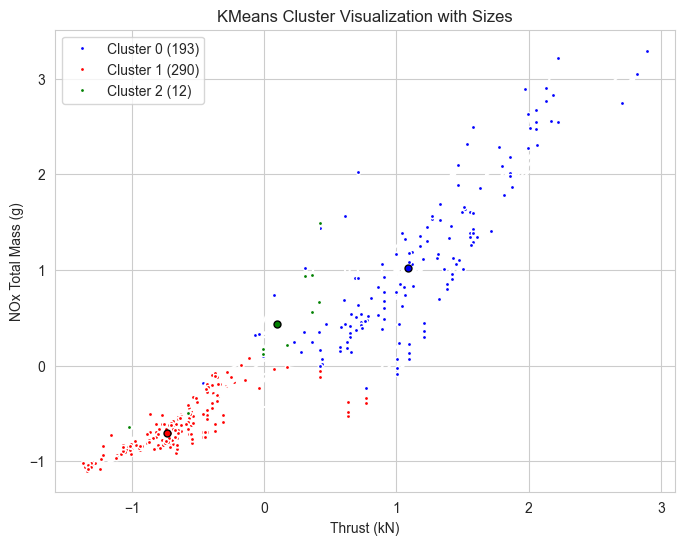

In [542]:
import matplotlib.pyplot as plt
import numpy as np

# fig
fig = plt.figure(figsize=(8, 6))
colors = ['blue','red','green']

ax = fig.add_subplot(1, 1, 1)

# Iterate through each cluster to plot
for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    my_members = (k_means.labels_ == k)  # Members of cluster k
    cluster_center = k_means.cluster_centers_[k]

    # Scatter plot of cluster points - thrust and Nox

    ax.plot(X[my_members, 2], X[my_members, 25], 'w', markerfacecolor=col, marker='.',label=f"Cluster {k} ({np.sum(my_members)})")
     # X[my_members, 0] selects all the values from column 0 (x-axis feature) where my_members is True.
     # X[my_members, 1] selects all the values from column 1 (y-axis feature) for the same rows.
    # Mark the centroid
    ax.plot(cluster_center[2], cluster_center[25], 'o', markerfacecolor=col, markeredgecolor='k', markersize=5)

# Add labels and legend
ax.set_xlabel("Thrust (kN)")
ax.set_ylabel("NOx Total Mass (g)")
ax.set_title("KMeans Cluster Visualization with Sizes")
ax.legend()

plt.show()


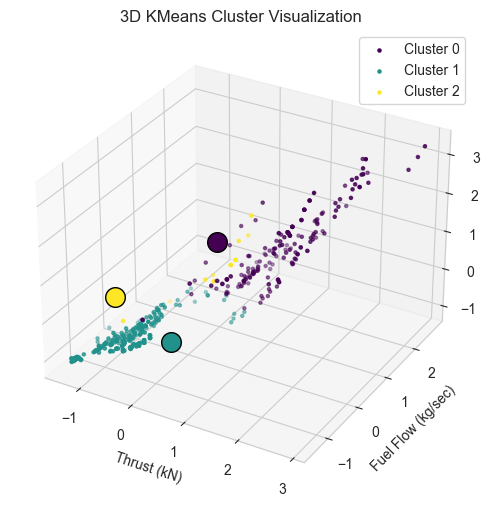

In [558]:
# Let's visualize with 3 features to evaluate the trade-off between engine power, fuel consumption, and emissions. Efficiency vs pollution


# 3D Plot
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Define Colors for Each Cluster
colors = plt.cm.viridis(np.linspace(0, 1, len(k_means.cluster_centers_)))

# Plot Clusters and Centroids
for k, col in zip(range(len(k_means.cluster_centers_)), colors):
    my_members = (k_means.labels_ == k)  # Fixed the condition here
    cluster_center = k_means.cluster_centers_[k]
    
    # Scatter points for each cluster
    ax.scatter(X[my_members, 2], X[my_members, 30], X[my_members, 25], 
               c=[col], marker='.', label=f"Cluster {k}")
    
    # Mark Centroids
    ax.scatter(cluster_center[0], cluster_center[1], cluster_center[2], 
               c=[col], marker='o', edgecolor='black', s=200)

# Set Labels and Title
ax.set_xlabel('Thrust (kN)')
ax.set_ylabel('Fuel Flow (kg/sec)')
ax.set_zlabel('NOx Total Mass (g)')
ax.set_title('3D KMeans Cluster Visualization')
# Display Legend and Plot
plt.legend()
plt.show()


In [ ]:
# K-Means assumes spherical clusters. Cluster Shape Mismatch. The clusters are elongated or overlapping .
# lets try DBSCAN

### DBSCAN

In [647]:
from sklearn.cluster import DBSCAN

# model
dbscan = DBSCAN(eps=3, min_samples=5)

# Fit and predict clusters
labels = dbscan.fit_predict(X)
df_dense = gse_processed.copy().drop('Cluster', axis =1)
# Add cluster labels to the dataset
df_dense['cluster'] = labels

# Inspect the results
print(df_dense['cluster'].value_counts())


cluster
 2    339
 1     83
-1     53
 0      8
 3      7
 4      5
Name: count, dtype: int64


In [649]:
df_dense.head()

,b/p_ratio,pressure_ratio,rated_thrust_(kn),hc_ei_t/o_(g/kg),hc_ei_c/o_(g/kg),hc_ei_app_(g/kg),hc_ei_idle_(g/kg),hc_dp/foo_characteristic_(g/kn),co_ei_t/o_(g/kg),co_ei_c/o_(g/kg),...,co_lto_total_mass_(g),nox_lto_total_mass_(g),fuel_flow_t/o_(kg/sec),fuel_flow_c/o_(kg/sec),fuel_flow_app_(kg/sec),fuel_flow_idle_(kg/sec),fuel_lto_cycle_(kg)__,eng_type_MTF,eng_type_TF,cluster
2,5.2,18.1,33.7,0.25,0.29,0.64,2.51,8.7,0.75,0.92,...,1468.0,1563.0,0.377,0.315,0.117,0.049,162.0,True,False,0
4,4.8,18.0,34.9,0.22,0.26,0.66,3.82,11.4,0.77,0.96,...,1865.0,1456.0,0.383,0.318,0.113,0.046,157.0,True,False,0
5,4.8,18.0,34.9,0.00,0.00,0.18,5.04,16.2,0.12,0.01,...,2383.0,1607.0,0.383,0.318,0.113,0.046,157.0,True,False,1
8,4.8,17.9,34.7,0.22,0.26,0.66,3.92,11.7,0.77,0.97,...,1874.0,1442.0,0.381,0.316,0.113,0.046,156.0,True,False,0
9,4.8,17.9,34.7,0.00,0.00,0.18,5.10,16.4,0.00,0.00,...,2389.0,1592.0,0.381,0.316,0.113,0.046,156.0,True,False,1


In [651]:
df_dense.columns

Index(['b/p_ratio', 'pressure_ratio', 'rated_thrust_(kn)', 'hc_ei_t/o_(g/kg)',
       'hc_ei_c/o_(g/kg)', 'hc_ei_app_(g/kg)', 'hc_ei_idle_(g/kg)',
       'hc_dp/foo_characteristic_(g/kn)', 'co_ei_t/o_(g/kg)',
       'co_ei_c/o_(g/kg)', 'co_ei_app_(g/kg)', 'co_ei_idle_(g/kg)',
       'co_dp/foo_characteristic_(g/kn)', 'nox_ei_t/o_(g/kg)',
       'nox_ei_c/o_(g/kg)', 'nox_ei_app_(g/kg)', 'nox_ei_idle_(g/kg)',
       'nox_dp/foo_characteristic_(g/kn)', 'sn_t/o', 'sn_c/o', 'sn_app',
       'sn_idle', 'sn_characteristic', 'hc_lto_total_mass_(g)',
       'co_lto_total_mass_(g)', 'nox_lto_total_mass_(g)',
       'fuel_flow_t/o_(kg/sec)', 'fuel_flow_c/o_(kg/sec)',
       'fuel_flow_app_(kg/sec)', 'fuel_flow_idle_(kg/sec)',
       'fuel_lto_cycle_(kg)__', 'eng_type_MTF', 'eng_type_TF', 'cluster'],
      dtype='object')

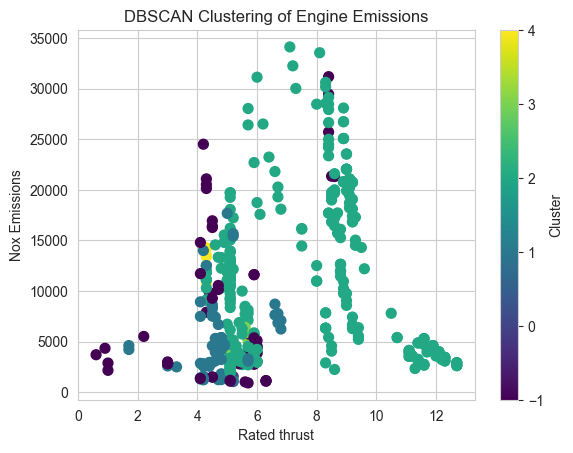

In [657]:
plt.scatter(df_dense['b/p_ratio'], df['nox_lto_total_mass_(g)'], c=labels, cmap='viridis', s=50)
plt.title("DBSCAN Clustering of Engine Emissions")
plt.xlabel("Rated thrust")
plt.ylabel("Nox Emissions")
plt.colorbar(label='Cluster')
plt.show()


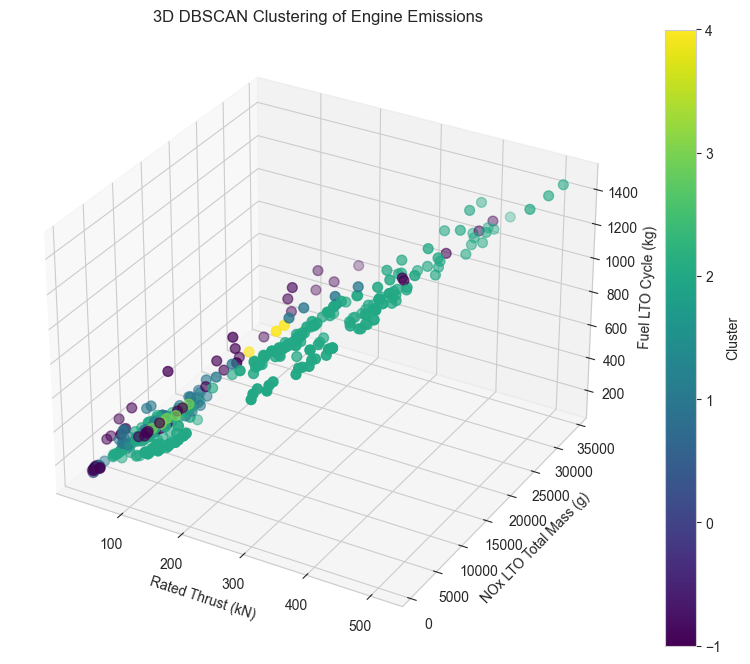

In [661]:
# 3d plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot with color corresponding to cluster labels
sc = ax.scatter(df_dense['rated_thrust_(kn)'], 
                df_dense['nox_lto_total_mass_(g)'], 
                df_dense['fuel_lto_cycle_(kg)__'], 
                c=labels, cmap='viridis', s=50)

# Add axis labels
ax.set_xlabel('Rated Thrust (kN)')
ax.set_ylabel('NOx LTO Total Mass (g)')
ax.set_zlabel('Fuel LTO Cycle (kg)')

# Add a color bar for cluster identification
plt.colorbar(sc, label='Cluster')

plt.title('3D DBSCAN Clustering of Engine Emissions')
plt.show()


In [667]:
df_dense.groupby('cluster').mean().T


cluster,-1,0,1,2,3,4
b/p_ratio,4.943396,4.925000,4.650602,7.400000,5.442857,4.3000
pressure_ratio,24.847170,17.337500,25.633735,33.515634,29.314286,28.6200
rated_thrust_(kn),141.592453,33.150000,93.026506,215.670206,125.714286,222.4000
hc_ei_t/o_(g/kg),0.193208,0.232500,0.024940,0.044720,0.075714,0.6200
hc_ei_c/o_(g/kg),0.178491,0.272500,0.030964,0.049440,0.098571,0.7000
hc_ei_app_(g/kg),1.613585,0.670000,0.078434,0.096460,4.307143,1.0200
hc_ei_idle_(g/kg),9.739245,4.155000,1.897349,2.067463,4.241429,23.1200
hc_dp/foo_characteristic_(g/kn),27.433962,12.500000,5.315663,4.025959,11.500000,39.4400
co_ei_t/o_(g/kg),1.059811,0.816250,0.483373,0.341947,0.884286,0.5000
co_ei_c/o_(g/kg),1.846604,1.013750,0.490000,0.364366,2.454286,0.5000


##### DBSCAN Cluster profiles
Cluster -1 (Noise) – Outliers with extreme thrust and emissions.<br>
Cluster 0 – Small, clean engines with low emissions.<br>
Cluster 1 – Efficient mid-range engines with low NOx and CO.<br>
Cluster 2 – High-performance engines with high thrust and NOx.<br>
Cluster 3 – Balanced performance and fuel efficiency.<br>
Cluster 4 – Powerful but dirty engines with the highest emissions.<br>



##### Cluster Characteristics

| Parameter | Cluster -1 | Cluster 0 | Cluster 1 | Cluster 2 | Cluster 3 | Cluster 4 |
|-----------|------------|------------|------------|------------|------------|------------|
| **Thrust (kN)** | ~141.6 (Moderate) | ~33.15 (Lowest) | ~93.0 (Low-Moderate) | ~215.7 (Highest) | ~125.7 (Moderate) | ~222.4 (Highest) |
| **Bypass Ratio (b/p_ratio)** | 4.94 (Moderate) | 4.92 (Moderate) | 4.65 (Lowest) | 7.4 (Highest – Modern Engines) | 5.44 (Moderate) | 4.3 (Low – Older Engines) |
| **Fuel Flow (kg/sec)** | ~1.41 (Moderate) | ~0.36 (Lowest) | ~0.95 (Low) | ~1.85 (High) | ~1.27 (Moderate) | ~2.36 (Highest) |
| **HC Emissions (g/kg)** | 0.19–9.73 (Moderate) | 0.23–4.16 (Low) | 0.02–1.89 (Lowest) | 0.04–2.07 (Low) | 0.07–4.31 (High) | 0.62–23.12 (Highest) |
| **CO Emissions (g/kg)** | ~1.06–37.7 (High) | ~0.82–24.1 (Moderate) | ~0.48–24.8 (Moderate) | ~0.34–23.8 (Low) | ~0.88–38.3 (High) | ~0.5–62.8 (Highest) |
| **NOx Total Mass (g)** | ~8624 (Moderate) | ~1346 (Lowest) | ~4482 (Low) | ~10699 (Highest) | ~4793 (Moderate) | ~13237 (High) |
| **Engine Type (MTF)** | ~36% | ~100% | ~100% | ~0% | ~0% | ~0% |
| **Engine Type (TF)** | ~64% | ~0% | ~0% | ~100% | ~100% | ~100% |
| **Emission Pattern** | Fluctuating across phases | Low across all phases | Low across all phases | Balanced emissions across phases | High across all phases | Very high across all phases |
